# Dependencies

In [34]:
import numpy as np
import random
from scipy import linalg
from scipy.optimize import minimize
from itertools import product
import json
import os
import glob
from string import *

import matplotlib.pyplot as plt

In [35]:
def load(name_of_the_dataset):

    with open('data/'+name_of_the_dataset+'_durations.json', 'r') as file:
        duration_datasets[name_of_the_dataset]=json.load(file)

def clear(name_of_the_dataset):
    if os.path.isfile('data/'+name_of_the_dataset+'_durations.json'):
        os.remove('data/'+name_of_the_dataset+'_durations.json')
        
    if name_of_the_dataset in duration_datasets:
        del duration_datasets[name_of_the_dataset]
        
def update(duration_datasets, name_of_the_dataset, durations):
    
    if os.path.isfile('data/'+name_of_the_dataset+'_durations.json'):
        
        with open('data/'+name_of_the_dataset+'_durations.json', 'r') as file:
            duration_datasets[name_of_the_dataset]=json.load(file)
    
    else:        
        print(f'file {name_of_the_dataset}_durations.json didnt exist yet!')
    
    if (not name_of_the_dataset in duration_datasets):
        
        duration_datasets[name_of_the_dataset]=durations
        
        print(f'entry {name_of_the_dataset} in duration_datasets didnt exist yet!')
    
    elif not tuple(duration_datasets[name_of_the_dataset][-len(durations):])==tuple(durations):

        duration_datasets[name_of_the_dataset]+=durations

    else:
        print('You already updated this! No action taken')
    
    
    with open('data/'+name_of_the_dataset+'_durations.json', 'w') as file:
            json.dump(duration_datasets[name_of_the_dataset],file)
    
             
def prepare(type_of_protocol):

    clear(type_of_protocol)

    data_file_names=glob.glob(f'data/{type_of_protocol}_durations/*.json')



    new_dataset=[]



    for file_name in data_file_names:
    #     print(f'attempting to load file {file_name}..')

        with open(file_name, 'r') as file:
            if os.stat(file_name).st_size != 0:
                new_dataset=json.load(file)

    #             print('..done')



                update(duration_datasets, type_of_protocol, new_dataset)

    #         else:
    #             print('..didn"t manage')
    



# Loading data

In [3]:
duration_datasets=dict()
trajectories_datasets=dict()
entries=[entry for entry in glob.glob(f'data/*') if entry[-5:]!='.json']
entries.sort()
print(entries)

['data/AKLT_3_blind_90%_durations', 'data/AKLT_3_blind_99%_durations', 'data/AKLT_3_feedback_90%_durations', 'data/AKLT_3_feedback_99%_durations', 'data/AKLT_3_feedback_99%_trajectories', 'data/AKLT_4_blind_90%_durations', 'data/AKLT_4_blind_99%_durations', 'data/AKLT_4_feedback_90%_durations', 'data/AKLT_4_feedback_99%_durations', 'data/AKLT_5_blind_90%_durations', 'data/AKLT_5_blind_99%_durations', 'data/AKLT_5_feedback_90%_durations', 'data/AKLT_5_feedback_99%_durations', 'data/AKLT_5_feedback_99%_trajectories', 'data/AKLT_6_blind_90%_durations', 'data/AKLT_6_blind_99%_durations', 'data/AKLT_6_feedback_90%_durations', 'data/AKLT_6_feedback_99%_durations', 'data/W_state_blind_90%_durations', 'data/W_state_blind_99%_durations', 'data/W_state_feedback_90%_durations', 'data/W_state_feedback_99%_durations']


# W state histograms

In [16]:
prepare('W_state_blind_90%')
prepare('W_state_feedback_90%')
prepare('W_state_blind_99%')
prepare('W_state_feedback_99%')
len(duration_datasets['W_state_feedback_99%'])

file W_state_blind_90%_durations.json didnt exist yet!
entry W_state_blind_90% in duration_datasets didnt exist yet!
file W_state_feedback_90%_durations.json didnt exist yet!
entry W_state_feedback_90% in duration_datasets didnt exist yet!
file W_state_blind_99%_durations.json didnt exist yet!
entry W_state_blind_99% in duration_datasets didnt exist yet!
file W_state_feedback_99%_durations.json didnt exist yet!
entry W_state_feedback_99% in duration_datasets didnt exist yet!


10000

In [40]:
np.mean(duration_datasets['W_state_feedback_99%'])

365.0113

In [39]:
np.std(duration_datasets['W_state_feedback_99%'])/np.sqrt(len(duration_datasets['W_state_feedback_99%']))

1.362454864291291

In [19]:
# setting font

from matplotlib import rc
from matplotlib import rcParams
import matplotlib.font_manager as font_manager

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['font.size'] = 26

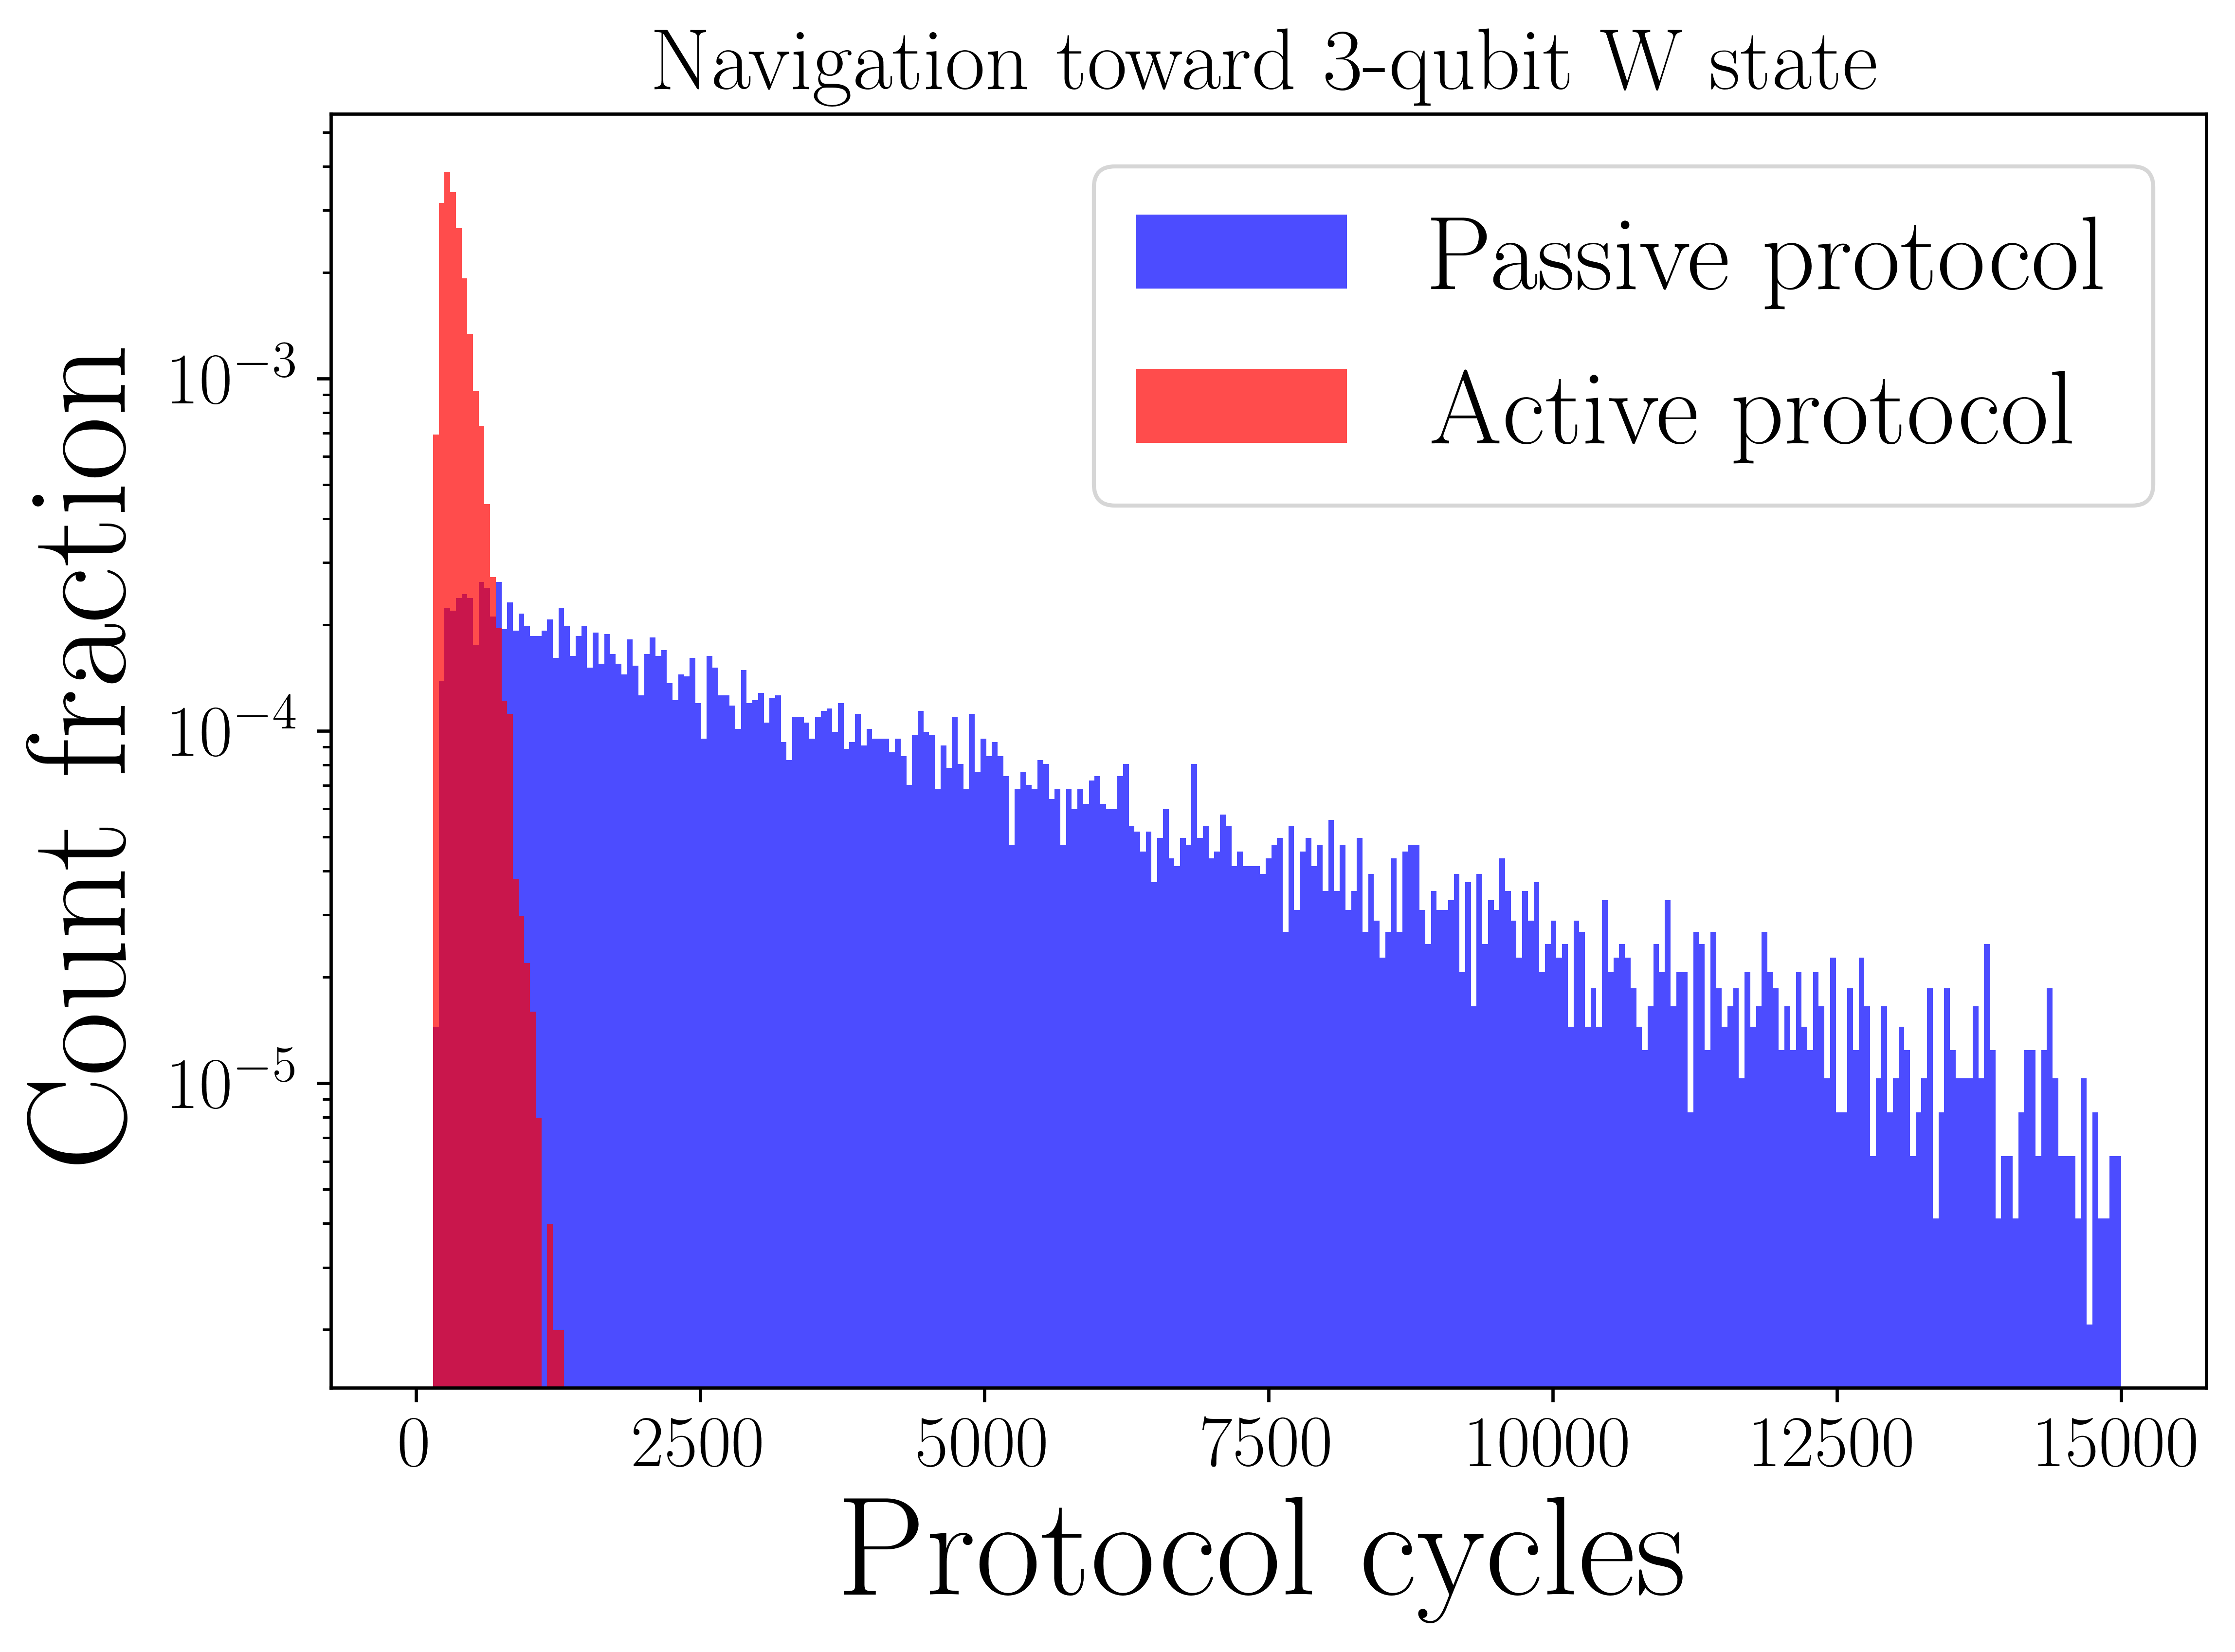

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(8,6), dpi=600)

his=axes

bins = np.linspace(0, 15000, 300)


his.hist(duration_datasets['W_state_blind_99%'], bins, alpha=0.7, 
         label='Passive protocol', density=True, color='blue')
his.hist(duration_datasets['W_state_feedback_99%'], bins, alpha=0.7, 
         label='Active protocol', density=True, color='red')

his.legend(loc='upper right', prop=font_manager.FontProperties(
                                   family='sans serif', size=26))

his.set_ylabel('Count fraction', fontsize=35)

his.set_title('Navigation toward 3-qubit W state')

his.set_xlabel('Protocol cycles', fontsize=35)

his.set_yscale('log')

plt.tight_layout()

plt.show()

fig.savefig('figures/W_histogram.pdf')

# AKLT histograms

In [28]:
prepare('AKLT_3_blind_99%')
prepare('AKLT_3_feedback_99%')
prepare('AKLT_4_blind_99%')
prepare('AKLT_4_feedback_99%')
prepare('AKLT_5_blind_99%')
prepare('AKLT_5_feedback_99%')
prepare('AKLT_6_blind_99%')
prepare('AKLT_6_feedback_99%')
len(duration_datasets['AKLT_6_blind_99%'])

file AKLT_3_blind_99%_durations.json didnt exist yet!
entry AKLT_3_blind_99% in duration_datasets didnt exist yet!
file AKLT_3_feedback_99%_durations.json didnt exist yet!
entry AKLT_3_feedback_99% in duration_datasets didnt exist yet!
file AKLT_4_blind_99%_durations.json didnt exist yet!
entry AKLT_4_blind_99% in duration_datasets didnt exist yet!
file AKLT_4_feedback_99%_durations.json didnt exist yet!
entry AKLT_4_feedback_99% in duration_datasets didnt exist yet!
file AKLT_5_blind_99%_durations.json didnt exist yet!
entry AKLT_5_blind_99% in duration_datasets didnt exist yet!
file AKLT_5_feedback_99%_durations.json didnt exist yet!
entry AKLT_5_feedback_99% in duration_datasets didnt exist yet!
file AKLT_6_blind_99%_durations.json didnt exist yet!
entry AKLT_6_blind_99% in duration_datasets didnt exist yet!
file AKLT_6_feedback_99%_durations.json didnt exist yet!
entry AKLT_6_feedback_99% in duration_datasets didnt exist yet!


1000

In [42]:
np.mean(duration_datasets['AKLT_6_blind_99%'])

427.993

In [43]:
2*np.std(duration_datasets['AKLT_6_blind_99%'])/np.sqrt(len(duration_datasets['AKLT_6_blind_99%']))

24.6122363836365

In [44]:
np.mean(duration_datasets['AKLT_6_feedback_99%'])

45.321

In [45]:
2*np.std(duration_datasets['AKLT_6_feedback_99%'])/np.sqrt(len(duration_datasets['AKLT_6_feedback_99%']))

1.4182580287098678

In [14]:
# setting font

from matplotlib import rc
from matplotlib import rcParams

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['font.size'] = 26

In [17]:
from collections import Counter
z = duration_datasets['AKLT_5_blind_99%']
counts=dict(Counter(z))

ordered_counts=[]

nontriv_durs=[]

for dur, occur in counts.items():
    nontriv_durs+=[dur]
    
max(nontriv_durs)    

for i in range (100000):
    if i in counts:
        ordered_counts+=[counts[i]/len(duration_datasets['AKLT_5_blind_99%'])]
    else:
        ordered_counts+=[0]
        
sum(ordered_counts[600:])
    

0.03560000000000002

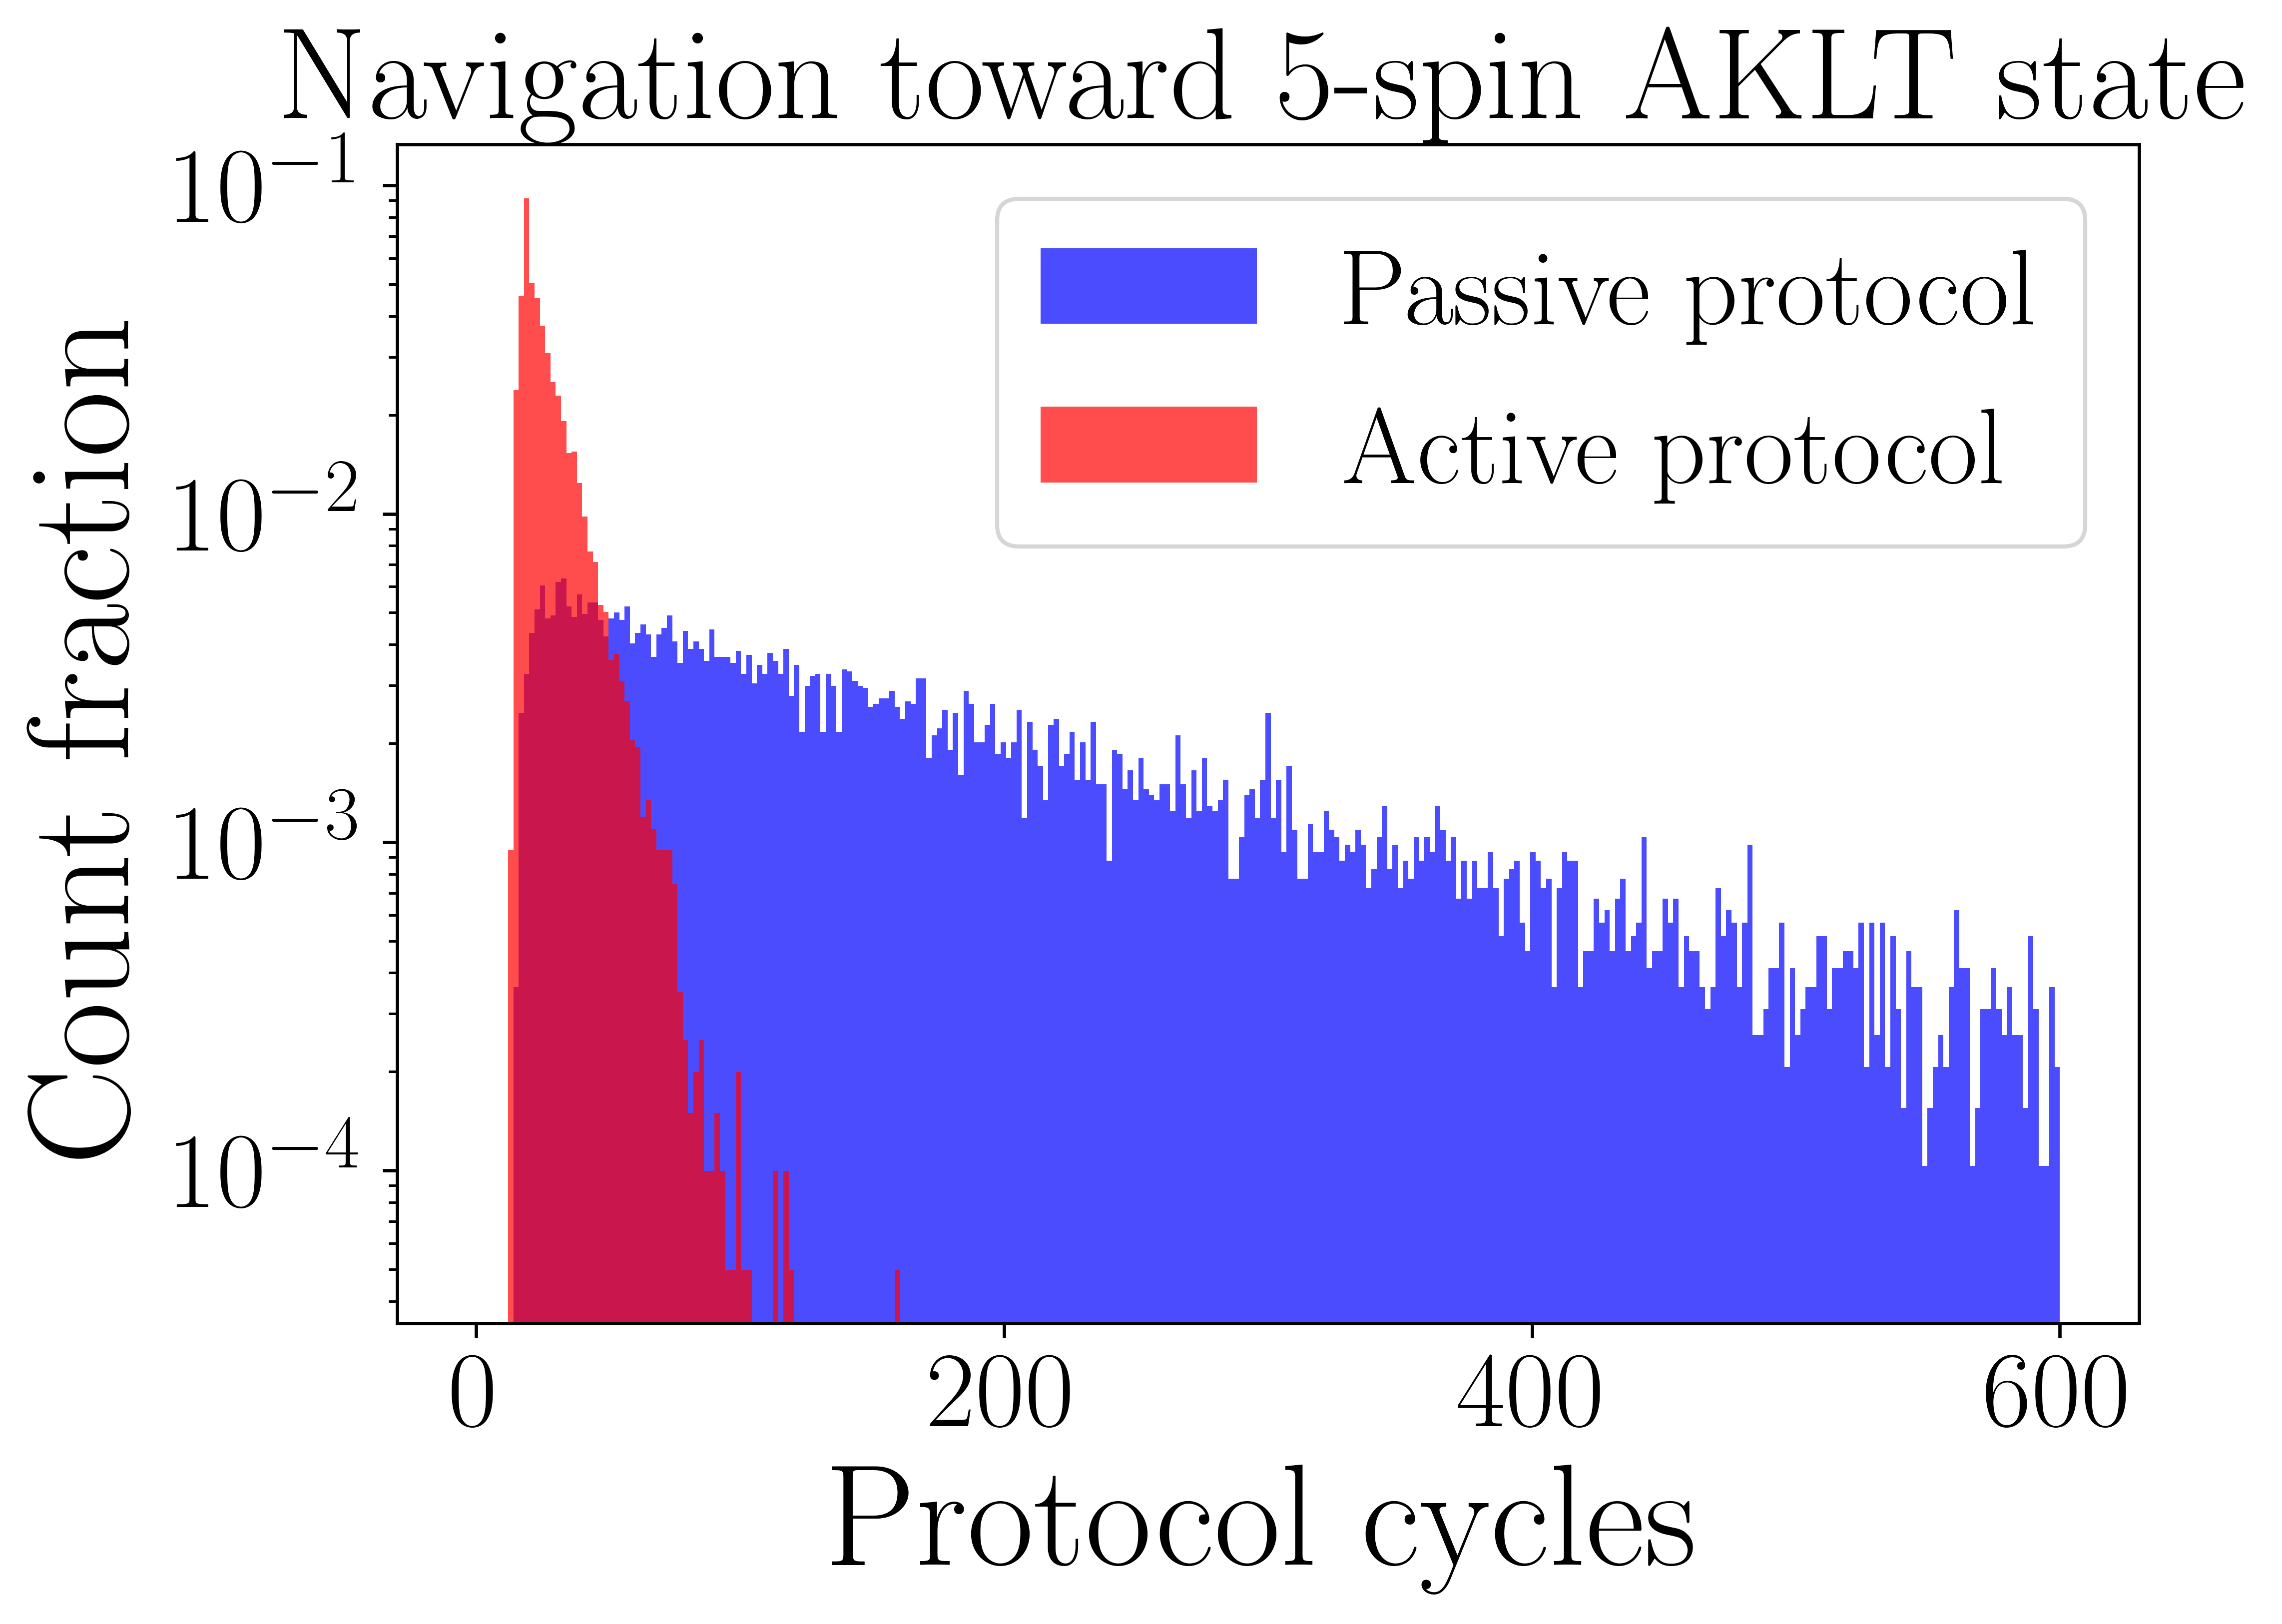

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(8,6), dpi=600)

his=axes

bins = np.linspace(0, 600, 300)


his.hist(duration_datasets['AKLT_5_blind_99%'], bins, alpha=0.7, 
         label='Passive protocol', density=True, color='blue')
his.hist(duration_datasets['AKLT_5_feedback_99%'], bins, alpha=0.7, 
         label='Active protocol', density=True, color='red')

his.legend(loc='upper right')

his.set_ylabel('Count fraction', fontsize=35)

his.set_title('Navigation toward 5-spin AKLT state')

his.set_xlabel('Protocol cycles', fontsize=35)

his.set_yscale('log')

plt.tight_layout()

plt.show()

fig.savefig('figures/AKLT_histogram.pdf')

# Trajectories 

In [215]:
# nice_trajectory=trajectories_dataset[116]


# with open('AKLT_passive_trajectory.json', 'w') as file:
#     json.dump(nice_trajectory, file)

In [29]:
with open('AKLT_passive_trajectory.json', 'r') as fp:
    AKLT_pas_traj=json.load(fp)
    
with open('AKLT_active_trajectory.json', 'r') as fp:
    AKLT_act_traj=json.load(fp)

In [26]:
# setting font

from matplotlib import rc
from matplotlib import rcParams

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['font.size'] = 18

In [33]:
plt.plot(1-np.array(AKLT_pas_traj))=

array([ 0.00000000e+00,  0.00000000e+00, -2.42462344e-03, -6.09911832e-03,
       -8.27619130e-03, -1.68478933e-02, -2.88528551e-02, -4.50751810e-02,
       -5.44199511e-02, -4.24214938e-02, -7.24690832e-02, -9.03958443e-02,
       -9.99582410e-02, -2.51159136e-02, -2.53726778e-02, -5.16944087e-02,
       -1.27163137e-02, -2.75282170e-02, -3.78422128e-05, -9.64451371e-05,
       -1.31875134e-03, -3.00894113e-03, -2.87186466e-02, -6.02981413e-02,
       -1.63155159e-01, -3.37277940e-01, -4.46293171e-02, -8.75758898e-02,
       -1.25220098e-02, -6.00286060e-03, -8.38353103e-04, -1.61539433e-03,
       -9.05478766e-02, -2.25471058e-02, -5.43602180e-05, -6.24736506e-04,
       -3.08474378e-03, -6.50918846e-03, -2.77579940e-05, -4.65410572e-04,
       -2.07563532e-03, -4.99710180e-03, -2.87908491e-03, -4.09401713e-04,
       -3.94024194e-03, -7.61098917e-03, -3.52793882e-02, -2.09015579e-03,
       -1.95002171e-03, -3.92661973e-03, -9.70440888e-03, -1.37487366e-02,
       -3.19866227e-02, -

ConversionError: Failed to convert value(s) to axis units: ['--', 1]

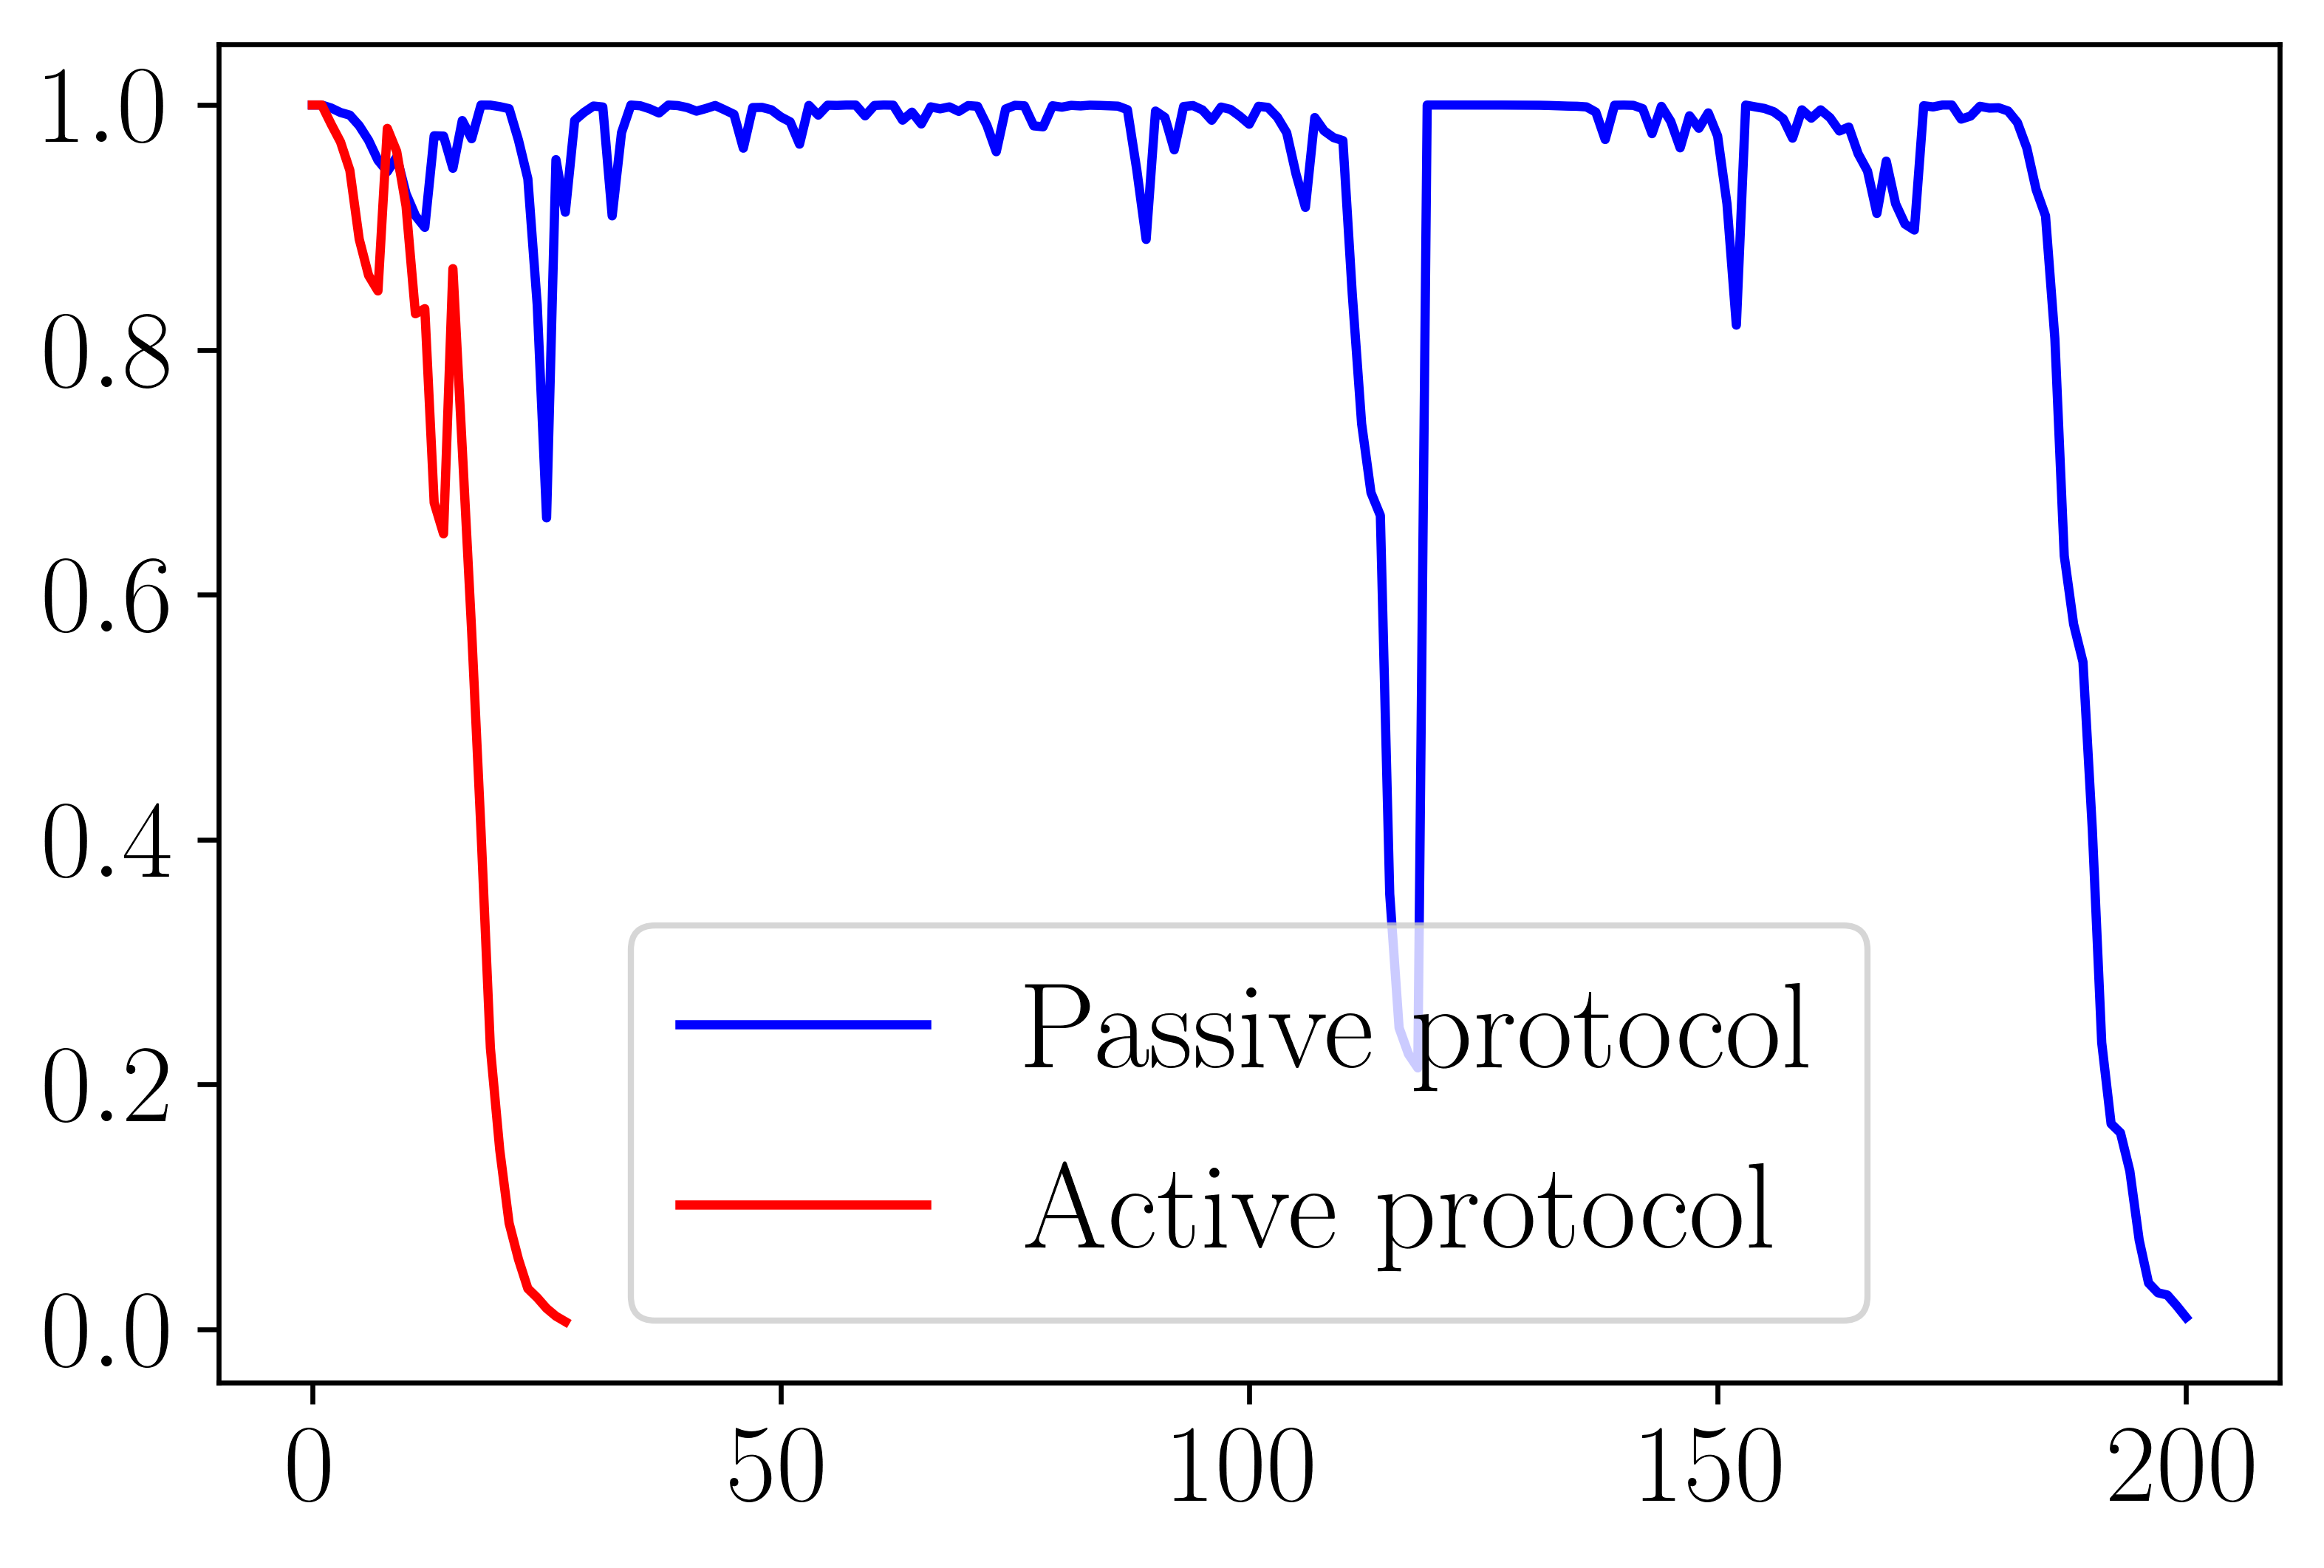

In [30]:

fig, ax = plt.subplots(1,1, dpi=600)

# his=ax[0]

# his.hist(duration_datasets['AKLT_5_blind_99%'], bins, alpha=0.7, 
#          label='Passive protocol', density=True, color='blue')
# his.hist(duration_datasets['AKLT_5_feedback_99%'], bins, alpha=0.7, 
#          label='Active protocol', density=True, color='red')

# his.legend(loc='upper right')

# his.set_ylabel('Count fraction', fontsize=35)

# his.set_title('Navigation toward 5-spin AKLT state')

# his.set_xlabel('Protocol cycles', fontsize=35)

# his.set_yscale('log')

# his.set_xlim([0,600])

traj=ax

t_pas=np.arange(0,201,1)

traj.plot(t_pas, AKLT_pas_traj, color='blue', label='Passive protocol')

t_act=np.arange(0,28,1)

traj.plot(t_act, AKLT_act_traj, color='red', label='Active protocol')

traj.legend(loc='lower center', fontsize=20)

traj.axhline(0.01, '--', color='grey')

traj.set_yscale('log')

traj.set_xlim([0,210])

traj.set_ylabel('Infidelity r', fontsize=22)

traj.set_title('Navigation toward 5-spin AKLT state')

traj.set_xlabel('Protocol cycles', fontsize=22)


plt.tight_layout()
plt.show()

fig.savefig("figures/AKLT_trajectory.pdf")

## Catching the good trajectory

In [211]:
data_file_names=glob.glob(f'trajectories_AKLT/*.json')



trajectories_dataset=[]



for file_name in data_file_names:
#     print(f'attempting to load file {file_name}..')

    with open(file_name, 'r') as file:
        if os.stat(file_name).st_size != 0:
            trajectories_dataset+=json.load(file)

#             print('..done')



            

In [232]:
[len(tr) for tr in list(filter(lambda tr: np.abs(len(tr)-199)<3, trajectories_dataset))]

[201]

# System size scaling

In [75]:
prepare('AKLT_3_blind_99%')
prepare('AKLT_3_feedback_99%')
prepare('AKLT_4_blind_99%')
prepare('AKLT_4_feedback_99%')
prepare('AKLT_5_blind_99%')
prepare('AKLT_5_feedback_99%')
prepare('AKLT_6_blind_99%')
prepare('AKLT_6_feedback_99%')
len(duration_datasets['AKLT_6_feedback_90%'])

file AKLT_3_blind_99%_durations.json didnt exist yet!
entry AKLT_3_blind_99% in duration_datasets didnt exist yet!
file AKLT_3_feedback_99%_durations.json didnt exist yet!
entry AKLT_3_feedback_99% in duration_datasets didnt exist yet!
file AKLT_4_blind_99%_durations.json didnt exist yet!
entry AKLT_4_blind_99% in duration_datasets didnt exist yet!
file AKLT_4_feedback_99%_durations.json didnt exist yet!
entry AKLT_4_feedback_99% in duration_datasets didnt exist yet!
file AKLT_5_blind_99%_durations.json didnt exist yet!
entry AKLT_5_blind_99% in duration_datasets didnt exist yet!
file AKLT_5_feedback_99%_durations.json didnt exist yet!
entry AKLT_5_feedback_99% in duration_datasets didnt exist yet!
file AKLT_6_blind_99%_durations.json didnt exist yet!
entry AKLT_6_blind_99% in duration_datasets didnt exist yet!
file AKLT_6_feedback_99%_durations.json didnt exist yet!
entry AKLT_6_feedback_99% in duration_datasets didnt exist yet!
file AKLT_3_blind_90%_durations.json didnt exist yet!
en

2640

In [89]:
passive_means=[]
passive_error_bars=[]
active_means=[]
active_error_bars=[]
sizes=[3,4,5,6]

for s in sizes:
    passive_means.append(np.mean(duration_datasets[f'AKLT_{s}_blind_99%']))
    passive_error_bars.append(2*np.std(duration_datasets[f'AKLT_{s}_blind_99%'])/np.sqrt(len(duration_datasets[f'AKLT_{s}_blind_99%'])))

for s in sizes:
    active_means.append(np.mean(duration_datasets[f'AKLT_{s}_feedback_99%']))
    active_error_bars.append(2*np.std(duration_datasets[f'AKLT_{s}_feedback_99%'])/np.sqrt(len(duration_datasets[f'AKLT_{s}_feedback_99%'])))

    
# passive_means_90=[]
# passive_error_bars_90=[]
# active_means_90=[]
# active_error_bars_90=[]


# for s in sizes:
#     passive_means_90.append(np.mean(duration_datasets[f'AKLT_{s}_blind_90%']))
#     passive_error_bars_90.append(2*np.std(duration_datasets[f'AKLT_{s}_blind_90%']
#                                       )/np.sqrt(len(duration_datasets[f'AKLT_{s}_blind_90%'])))

# for s in sizes:
#     active_means_90.append(np.mean(duration_datasets[f'AKLT_{s}_feedback_90%']))
#     active_error_bars_90.append(2*np.std(duration_datasets[f'AKLT_{s}_feedback_90%']
#                                      )/np.sqrt(len(duration_datasets[f'AKLT_{s}_feedback_90%'])))

    
ratio_error_bars=(np.array(active_means)*np.array(passive_error_bars
                    )+np.array(passive_means)*np.array(active_error_bars))/np.array(active_means)**2

In [87]:
np.array([1,2,3])**2

array([1, 4, 9])

In [110]:
from matplotlib import lines

In [125]:
np.array(passive_means)/np.array(active_means)

array([3.86554533, 6.21015172, 7.14592139, 9.44359127])

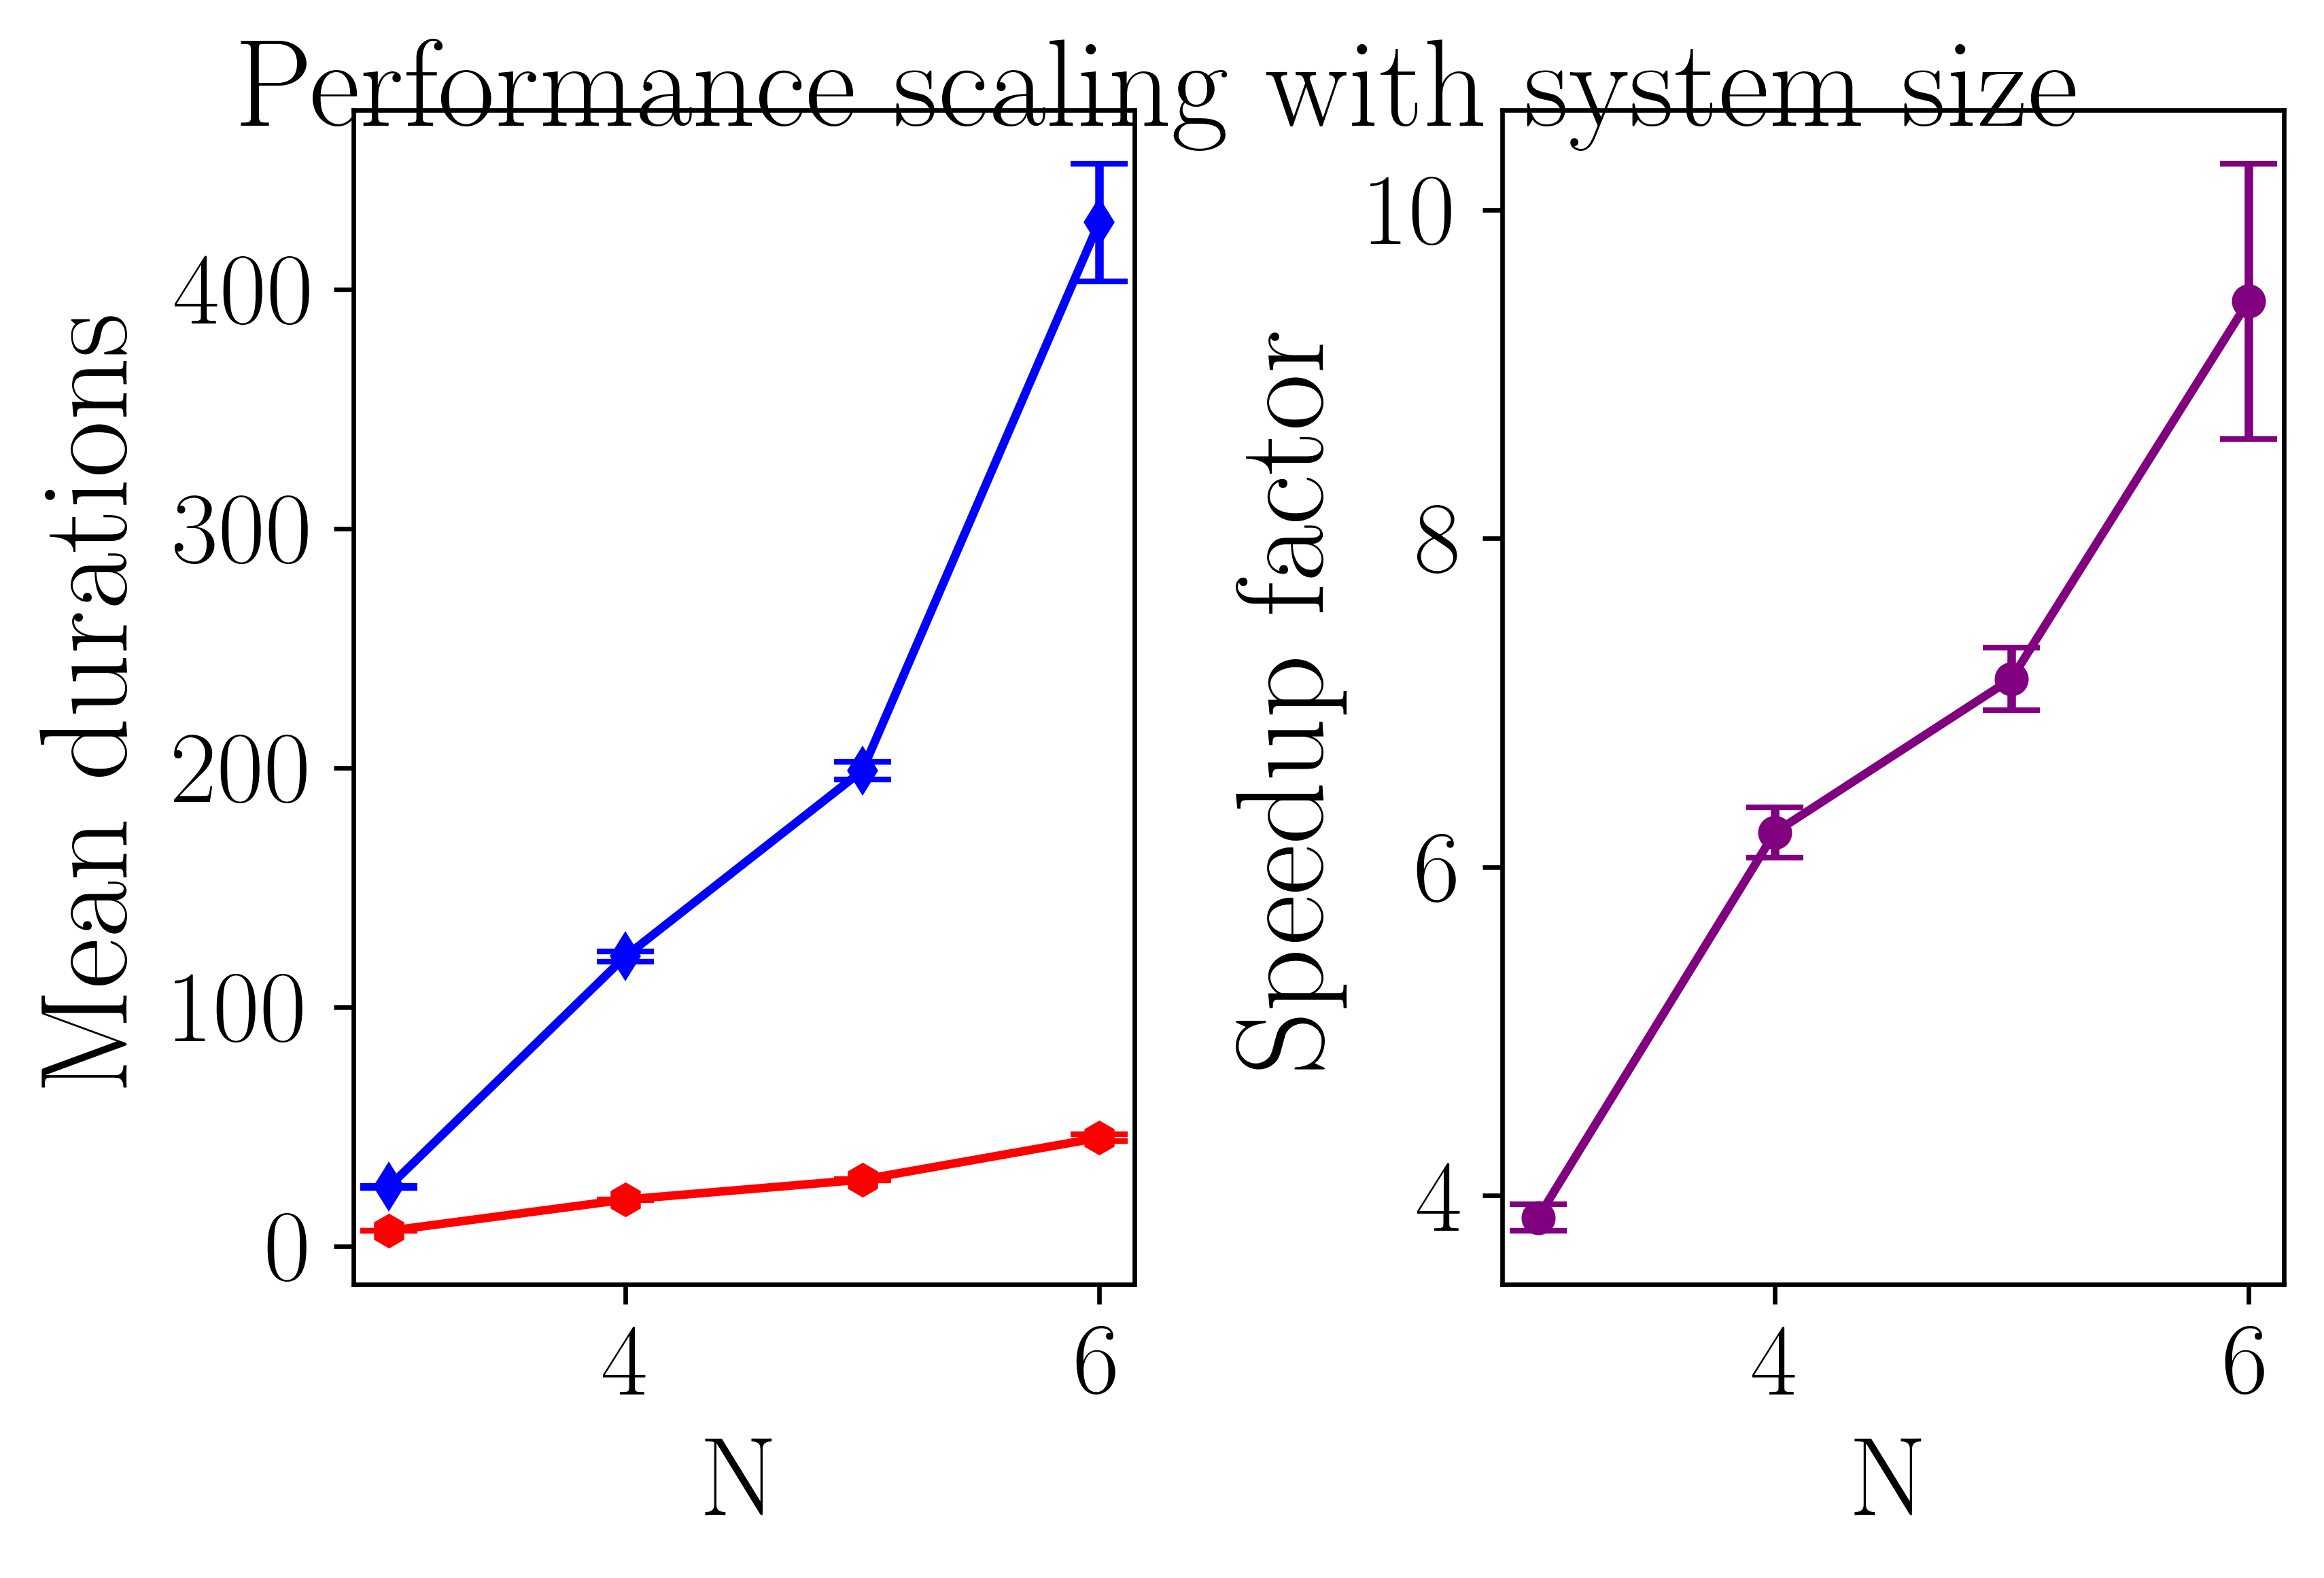

In [124]:
fig, ax=plt.subplots(1,2,dpi=600)

dur=ax[0]
sups=ax[1]

sups.errorbar(sizes, np.array(passive_means)/np.array(active_means), yerr=ratio_error_bars,
              label='Degree of speedup', fmt='-o', capsize=5, color = 'purple', markersize=5)
# sups.errorbar(sizes, np.array(passive_means_90)/np.array(active_means_90), label='Degree of speedup', fmt='o')
dur.errorbar(sizes, np.array(passive_means), yerr=passive_error_bars, label='Passive duration', fmt='-d', 
             capsize=5, color = 'blue', markersize=5)
dur.errorbar(sizes, np.array(active_means), yerr=active_error_bars, label='Active duration', fmt='-h', 
             capsize=5, color = 'red', markersize=5)
# dur.errorbar(sizes, np.array(passive_means_90), yerr=passive_error_bars_90, label='Passive duration', fmt='o')
# dur.errorbar(sizes, np.array(active_means_90), yerr=active_error_bars_90, label='Active duration', fmt='o')



sups.set_ylabel('Speedup factor', fontsize=22)

sups.set_xlabel('N', fontsize=20)

dur.set_ylabel('Mean durations', fontsize=22)

dur.set_xlabel('N', fontsize=20)


lines.Line2D.markersize=10

plt.tight_layout(pad=1.0)

fig.suptitle('Performance scaling with system size', fontsize=22)
plt.show()

fig.savefig("figures/AKLT_scaling.pdf")

In [56]:
np.array(active_means)

array([ 6.4190167, 19.5159   , 27.8232   , 45.321    ])

# Running numerics

In [198]:
file_name=f'AKLT.sh'

In [199]:
!sbatch $file_name

Submitted batch job 326403


In [186]:
!squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            325605   ibIntel sys/dash    bonet  R   13:13:05      1 maris079
            325606 compIntel sys/dash    fouka  R   11:42:05      1 maris076
            323276   compAMD   H_C_H2 garcia-a  R 8-21:27:08      1 maris064
            323278   compAMD  H_C_H15 garcia-a  R 8-21:21:37      1 maris064
            323277   compAMD  H_C_H15 garcia-a  R 8-21:24:06      1 maris064
            323274   compAMD   H_C_H1 garcia-a  R 8-21:33:43      1 maris064
            323280   compAMD   H_C_H1 garcia-a  R 8-21:16:50      1 maris064
            323281   compAMD  H_C_H05 garcia-a  R 8-21:14:51      1 maris064
            323282   compAMD   H_C_H2 garcia-a  R 8-21:09:45      1 maris064
            323273   compAMD   H_C_H0 garcia-a  R 8-22:46:01      1 maris064
            323272   compAMD   H_C_H0 garcia-a  R 8-22:50:24      1 maris064
            323271   compAMD   H_C_H0 garcia-a  R 8-23:06:34      1 

In [234]:
!sinfo -o " %n  %P  %C " -N --nodes="maris[076-081]"

 HOSTNAMES  PARTITION  CPUS(A/I/O/T) 
 maris076  compIntel  4/92/0/96 
 maris077  compIntel  0/96/0/96 
 maris078  ibIntel  94/2/0/96 
 maris079  ibIntel  46/2/0/48 
 maris080  ibIntel  46/2/0/48 
 maris081  ibIntel  24/24/0/48 


In [173]:
!scancel 326263

# Pretty figures

## Double-axis plots 

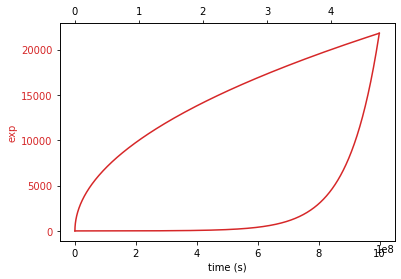

In [13]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

ax2.plot(, data1, color=color)

plt.show()

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

## Basics

In [36]:
import matplotlib.pyplot as plt
import random
import numpy as np

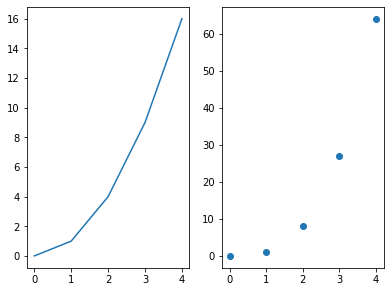

In [44]:
fig = plt.figure(1, figsize=(6.4, 4.8))

x = [0, 1, 2, 3, 4]
x2 = [k**2 for k in x]
x3 = [k**3 for k in x]

squares_plot = fig.add_subplot(121)
cubes_plot = fig.add_subplot(122)

squares_plot.plot(x, x2)
cubes_plot.scatter(x,x3)

plt.show()

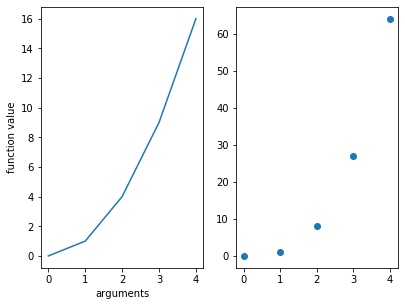

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(6.4, 4.8))

x = [0, 1, 2, 3, 4]
x2 = [k**2 for k in x]
x3 = [k**3 for k in x]

squares_plot = axes[0]
cubes_plot = axes[1]

squares_plot.plot(x, x2)
cubes_plot.scatter(x,x3)

squares_plot.set(xlabel='arguments', ylabel='function value')


plt.show()

## Pretty styles

In [319]:
!pip install seaborn --user

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl


No handles with labels found to put in legend.


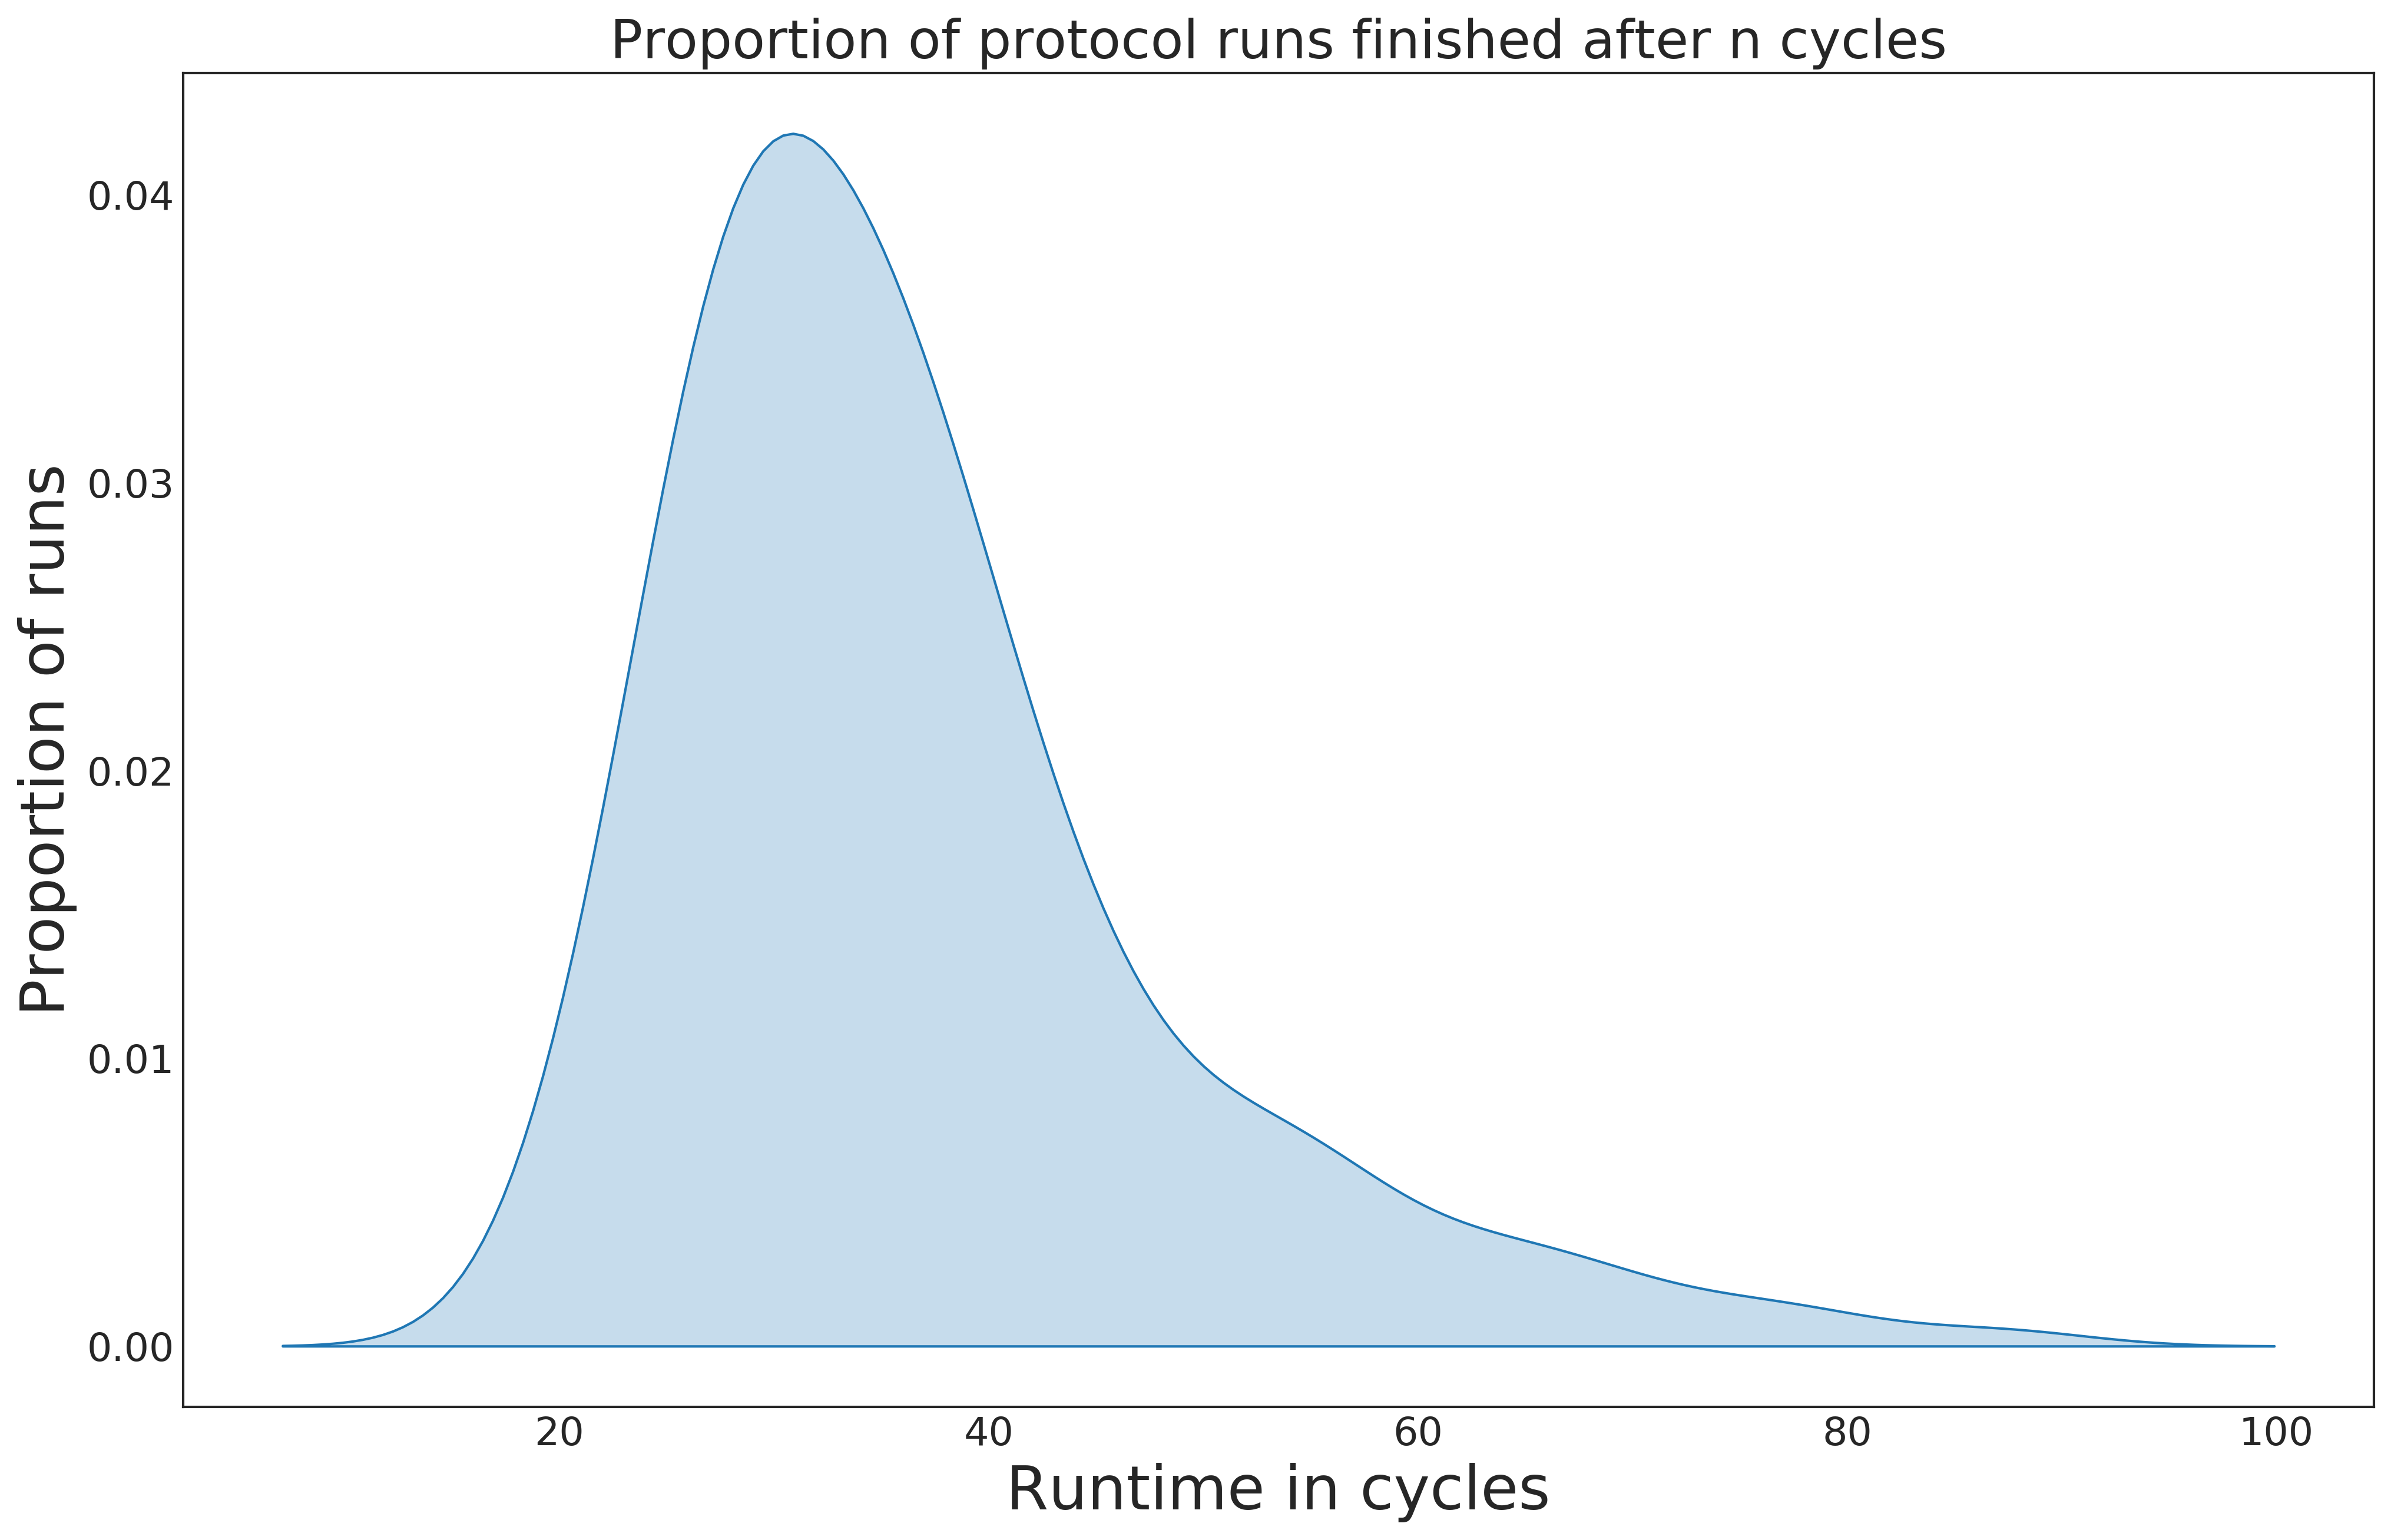

In [340]:
plt.figure(figsize=(16,10), dpi= 300)

sns.kdeplot(plotting_durations, shade=True)

#Must be said: it's a kernel density estimation of a histogram, not a histogram

plt.xlabel("Runtime in cycles",fontsize=25)
plt.ylabel("Proportion of runs",fontsize=25)

plt.title('Proportion of protocol runs finished after n cycles', fontsize=22)
plt.legend()
plt.show()

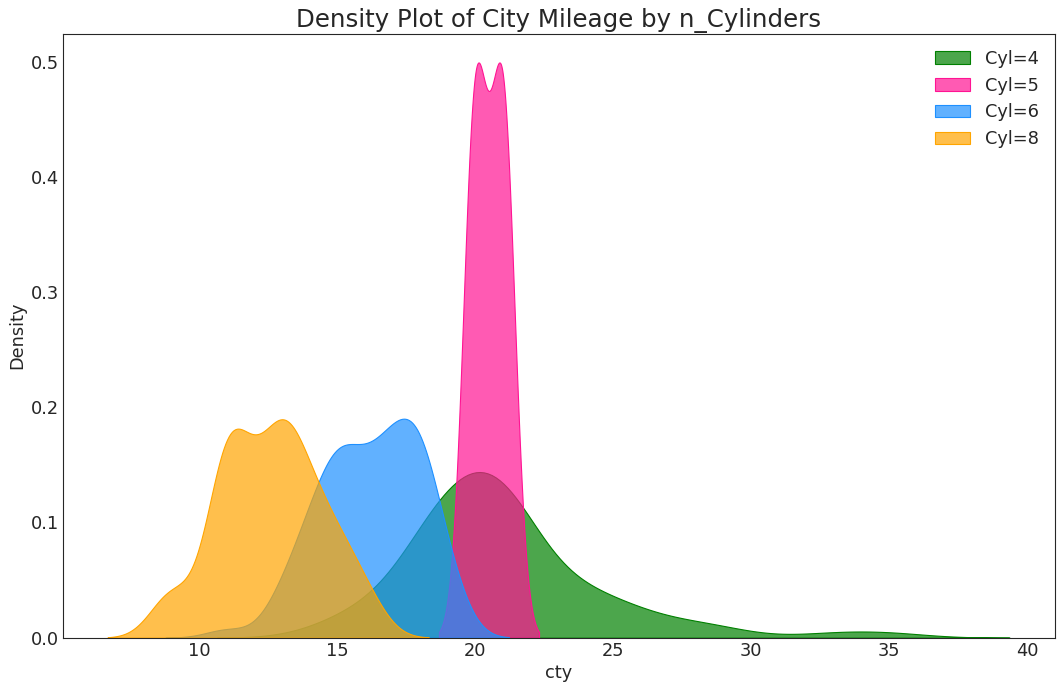

In [321]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

In [320]:
print(mpl.__version__)  
print(sns.__version__) 

3.1.1
0.11.1
